<a href="https://colab.research.google.com/github/rlaqhalx/machine_learning_study/blob/main/Deep_learning_image_classification_for_Number_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dataset
MNIST dataset

https://www.kaggle.com/datasets/oddrationale/mnist-in-csv


In [2]:
!kaggle datasets download -d oddrationale/mnist-in-csv

 53% 8.00M/15.2M [00:00<00:00, 81.9MB/s]
100% 15.2M/15.2M [00:00<00:00, 61.4MB/s]


In [3]:
!unzip mnist-in-csv.zip

Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


# Importing Libaray

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Loading dataset

Train & Test set

In [5]:
train_df = pd.read_csv('mnist_train.csv')

train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df = pd.read_csv('mnist_test.csv')

test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Label Distribution
- Exclude 9=J and 25=Z because they involve actions.
- There are a total of 24 labels.

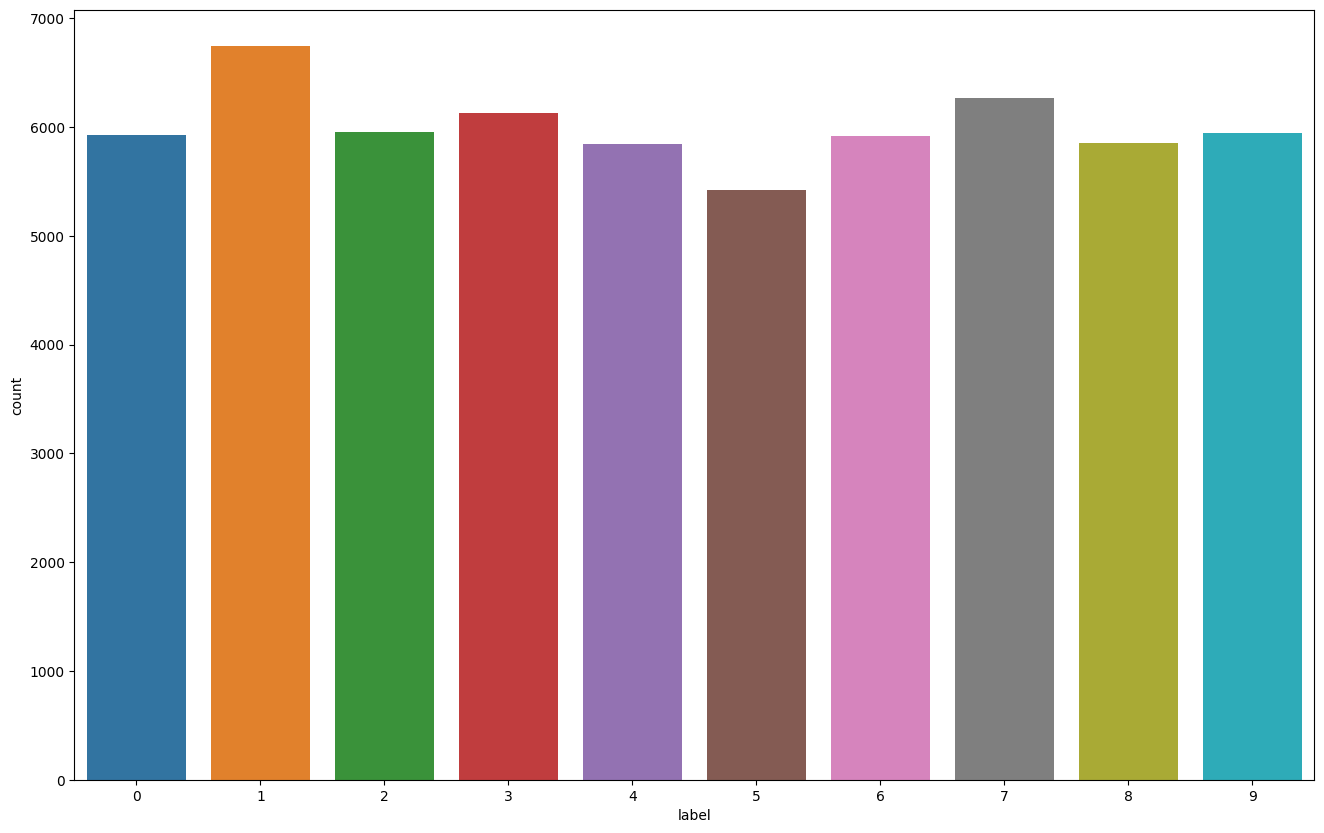

In [7]:
plt.figure(figsize=(16, 10))
sns.countplot(x='label', data=train_df)
# OR sns.countplot(train_df['label'])
plt.show()

# Data preprocessing

## Divide dataset into x (input) & y (output)

In [8]:
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1).values
y_train = train_df[['label']].values

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values
y_test = test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000, 1)
(10000, 784) (10000, 1)


## Preview of data

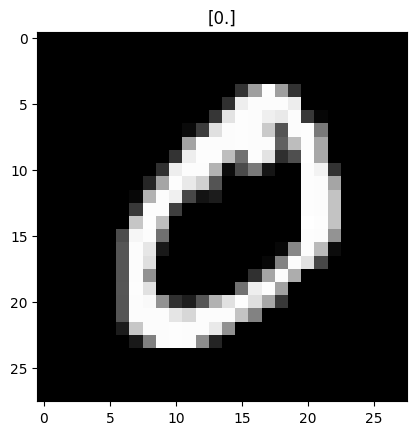

In [11]:
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()

## One-hot encoding

One-hot encoding for Output (label or y value)

In [12]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

print(y_train.shape)

(60000, 10)


## Normalization
Image data consists of pixels represented as integers ranging from 0 to 255 (unsigned integer 8-bit = uint8). I'll divide this by 255 to convert it into floating-point data ranging from 0 to 1 (floating point 32-bit = float32) and normalize it.

Normalization for input (x value)

![image.png](https://www.wallstreetmojo.com/wp-content/uploads/2023/05/Normalization-Formula-2.png.webp)

In [13]:
x_train = x_train / 255.
x_test = x_test / 255.

# Network Architecture

28 pixels * 28 pixels for one image per label
=> 784 (input)

10 numbers from 0 to 9 for (output)

In [14]:
input = Input(shape=(784,))
hidden = Dense(1024, activation='relu')(input)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(256, activation='relu')(hidden)
output = Dense(10, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1462538 (5.58 MB)
Trainable params: 1462538 (5.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training model

In [15]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1902 - acc: 0.9419 - val_loss: 0.0987 - val_acc: 0.9695
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0897 - acc: 0.9729 - val_loss: 0.0949 - val_acc: 0.9733
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0641 - acc: 0.9805 - val_loss: 0.0902 - val_acc: 0.9731
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0488 - acc: 0.9858 - val_loss: 0.0903 - val_acc: 0.9779
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0420 - acc: 0.9872 - val_loss: 0.0772 - val_acc: 0.9811
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0344 - acc: 0.9900 - val_loss: 0.0842 - val_acc: 0.9799
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0311 - acc: 0.9910 - val_loss: 0.1261 - val_acc: 0.9718
Epoch 8/20
1875/1875 [==============================] - 10s 5

# Training Result Graph


Text(0.5, 1.0, 'Training and Validation Loss')

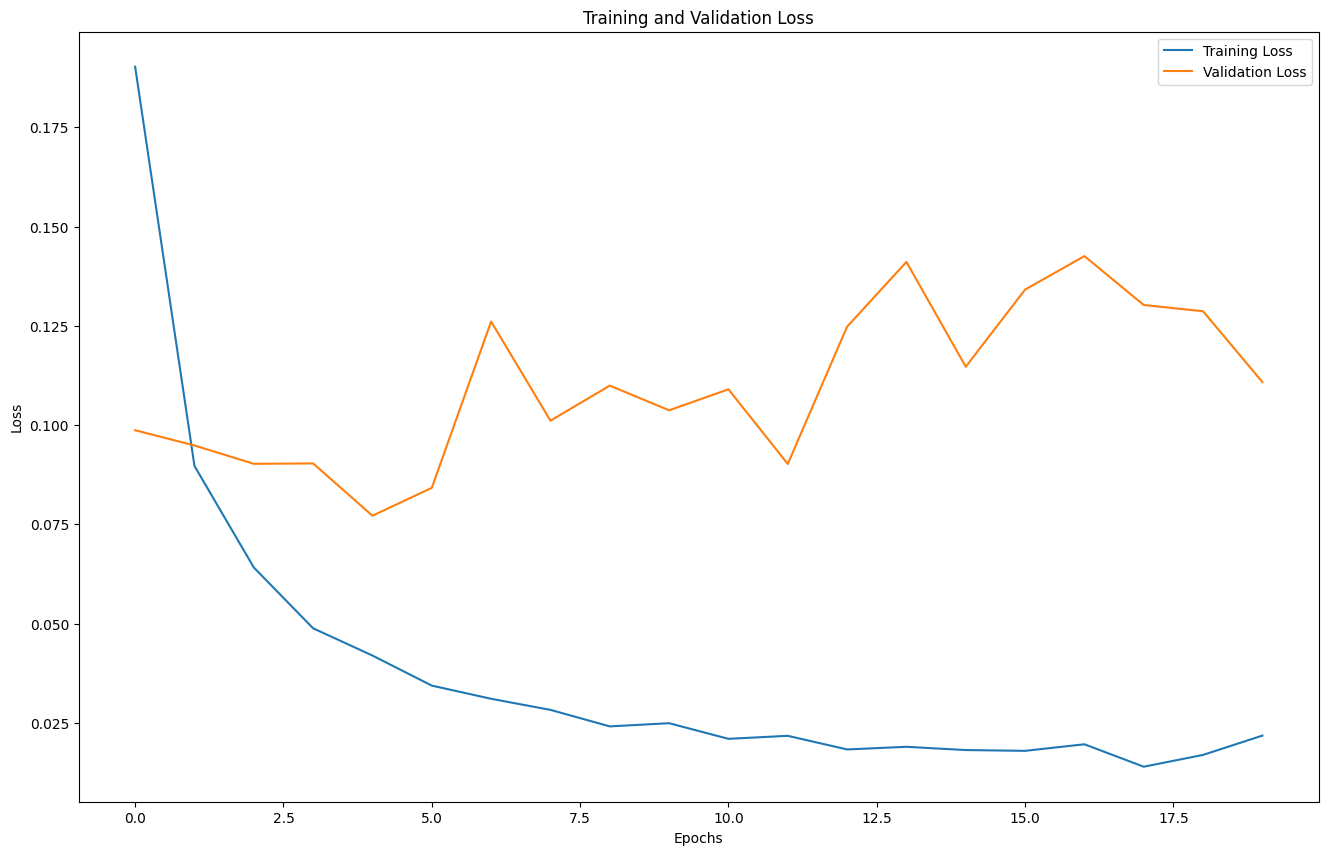

In [16]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training and Validation Accuracy')

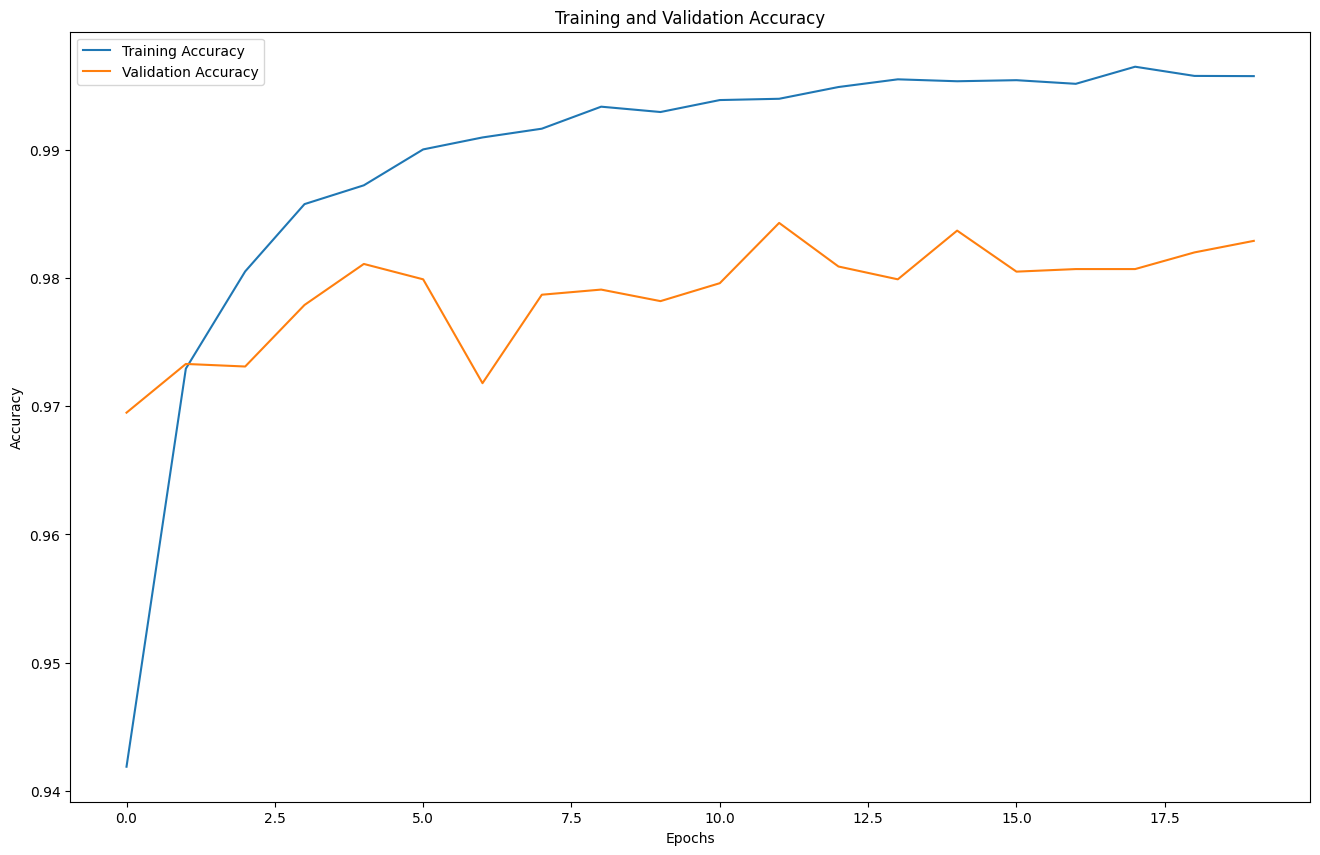

In [17]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')

plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')